# Predicting Fashion Dataset using Simple ANN artificial Nueral Network

* this is an exact replica of the official tensorflow tutotrial at --> https://www.tensorflow.org/tutorials/keras/classification

* Multiclass classification problem.

* 70,000 grayscale images at 28\*28 size. split into 10 categories

  * 60,000 images on training and 10,000 images on testing.

  * train and test set both contains two subset (train images, train labels , test images, test labels)

  * images - each image is  28\*28 with values ranging from 0-255.

  * labels - is an array of values between 0-9

    * 0--T-shirt/top 

    * 1-- Trouser

    *  2-- Pullover 

    * 3 -- Dress 

    * 4 -- Coat 

    * 5 -- Sandal 

    * 6 -- Shirt 

    * 7 -- Sneaker 

    * 8-- Bag 

    * 9-- Ankle boot

## Data Exploration

---

Information Validation

In [1]:
import tensorflow as tf
print(f"Tensorflow Version : {tf.__version__}")
# ensure that you have a tensorflow version above 2

from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt

Tensorflow Version : 2.1.0


In [2]:
#Load data from tensorflow library
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

## We have our training as well as testing dataset inside the variables x_train, x_test and our targets in y_train and y_test

In [3]:
print(f"Shape of x_train :{x_train.shape}")
print(f"Shape of y_train :{y_train.shape}")
print(f"Shape of x_test :{x_test.shape}")
print(f"Shape of y_test :{y_test.shape}")

## The information shared is valid, We have 70k images of 28*28 into train and test dataset. with 70k labels as an array 

Shape of x_train :(60000, 28, 28)
Shape of y_train :(60000,)
Shape of x_test :(10000, 28, 28)
Shape of y_test :(10000,)


In [4]:
## Checking if the values inside the array is between 0-255

print(f"Minimum Value inside the a random image array : {x_train[524].min()}")
print(f"Maximum Value inside the a random image array : {x_train[524].max()}")

Minimum Value inside the a random image array : 0
Maximum Value inside the a random image array : 255


In [5]:
print(f"Minium Value inside the y_train array :{y_train.min()}")
print(f"Maximum Value inside the y_train array :{y_train.max()}")
print(f"Unique values in y_train :{set(y_train)}")

Minium Value inside the y_train array :0
Maximum Value inside the y_train array :9
Unique values in y_train :{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Label of the image : Ankle boot


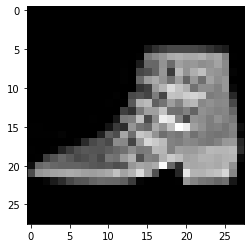

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
## Validating the dataset and checking if labeling has been done properly
num = 43987
plt.imshow(x_train[num], cmap='gray')
print(f"Label of the image : {class_names[y_train[num]]}")

Maximum value now in the image is 0.00392156862745098
Minimum value now in the image is 0.0
Label of the image : T-shirt/top


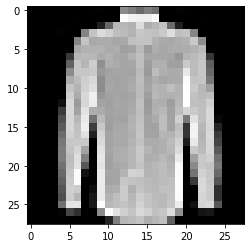

In [8]:
# Data Preparation

def my_normalize_function(data_array):
    return data_array/255.0

x_train = my_normalize_function(x_train)
x_test = my_normalize_function(x_test)

num = 46535
print(f"Maximum value now in the image is {x_train[num].max()}")
print(f"Minimum value now in the image is {x_train[num].min()}")

plt.imshow(x_train[num], cmap='gray')
print(f"Label of the image : {class_names[y_train[num]]}")



plt.imshow(x_test[8543], cmap='gray')

In [9]:
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [10]:
# Model Preparation

model  = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size = 32)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 333us/sample - loss: 0.8997 - accuracy: 0.7076
Epoch 2/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.5555 - accuracy: 0.8006
Epoch 3/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.4927 - accuracy: 0.8254
Epoch 4/10
60000/60000 [==============================] - 18s 303us/sample - loss: 0.4604 - accuracy: 0.8366
Epoch 5/10
60000/60000 [==============================] - 19s 317us/sample - loss: 0.4389 - accuracy: 0.8455
Epoch 6/10
60000/60000 [==============================] - 19s 310us/sample - loss: 0.4229 - accuracy: 0.8507
Epoch 7/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.4103 - accuracy: 0.8549
Epoch 8/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.4005 - accuracy: 0.8585
Epoch 9/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.3903 - accuracy: 0.8

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.4158 - accuracy: 0.8539

Test accuracy: 0.8539


In [16]:
predictions = model.predict(x_test)
# x_test[0].shape

In [18]:
import numpy as np
print(class_names[np.argmax(predictions[8543])])


# plt.imshow(x_test[8543], cmap='gray')

Shirt
